# Data exploration and analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

## Train dataset

In [2]:
from problem import get_train_data

data_train, labels_train = get_train_data()

In [3]:
data_train.head()

participants_site participants_sex  participants_age  \
subject_id                                                                   
1932355398536124106                   5                F          9.301370   
5174041730092253771                  19                M         29.000000   
10219322676643534800                 19                F         45.000000   
10645466564919190227                  5                F          9.216438   
14512541342641936232                 28                M         15.050000   

                      anatomy_lh_bankssts_area  \
subject_id                                       
1932355398536124106                      977.0   
5174041730092253771                     1279.0   
10219322676643534800                     926.0   
10645466564919190227                     983.0   
14512541342641936232                    1488.0   

                      anatomy_lh_caudalanteriorcingulate_area  \
subject_id                                                      
1932355398536124106                                     427.0   
5174041730092253771                                     730.0   
10219322676643534800                                    446.0   
10645466564919190227                                    588.0   
14512541342641936232                                    593.0   

                      anatomy_lh_caudalmiddlefrontal_area  \
subject_id                                                  
1932355398536124106                                1884.0   
5174041730092253771                                2419.0   
10219322676643534800                               1897.0   
10645466564919190227                               2479.0   
14512541342641936232                               2309.0   

                      anatomy_lh_cuneus_area  anatomy_lh_entorhinal_area  \
subject_id                                                                 
1932355398536124106                   1449.0                       463.0   
5174041730092253771                   1611.0                       467.0   
10219322676643534800                  2135.0                       570.0   
10645466564919190227                  1312.0                       525.0   
14512541342641936232                  1829.0                       726.0   

                      anatomy_lh_fusiform_area  \
subject_id                                       
1932355398536124106                     2790.0   
5174041730092253771                     3562.0   
10219322676643534800                    3064.0   
10645466564919190227                    3766.0   
14512541342641936232                    3720.0   

                      anatomy_lh_inferiorparietal_area     ...       \
subject_id                                                 ...        
1932355398536124106                             4091.0     ...        
5174041730092253771                             5380.0     ...        
10219322676643534800                            4834.0     ...        
10645466564919190227                            5091.0     ...        
14512541342641936232                            5432.0     ...        

                      anatomy_select  \
subject_id                             
1932355398536124106                1   
5174041730092253771                1   
10219322676643534800               1   
10645466564919190227               1   
14512541342641936232               1   

                                                           fmri_basc064  \
subject_id                                                                
1932355398536124106   ./data/fmri/basc064/1932355398536124106/run_1/...   
5174041730092253771   ./data/fmri/basc064/5174041730092253771/run_1/...   
10219322676643534800  ./data/fmri/basc064/10219322676643534800/run_1...   
10645466564919190227  ./data/fmri/basc064/10645466564919190227/run_1...   
14512541342641936232  ./data/fmri/basc064/14512541342641936232/run_1...   

                                                   

In [4]:
data = pd.concat([data_train, pd.Series(labels_train, index=data_train.index, name='target')], axis=1)

In [5]:
data.head()

participants_site participants_sex  participants_age  \
subject_id                                                                   
1932355398536124106                   5                F          9.301370   
5174041730092253771                  19                M         29.000000   
10219322676643534800                 19                F         45.000000   
10645466564919190227                  5                F          9.216438   
14512541342641936232                 28                M         15.050000   

                      anatomy_lh_bankssts_area  \
subject_id                                       
1932355398536124106                      977.0   
5174041730092253771                     1279.0   
10219322676643534800                     926.0   
10645466564919190227                     983.0   
14512541342641936232                    1488.0   

                      anatomy_lh_caudalanteriorcingulate_area  \
subject_id                                                      
1932355398536124106                                     427.0   
5174041730092253771                                     730.0   
10219322676643534800                                    446.0   
10645466564919190227                                    588.0   
14512541342641936232                                    593.0   

                      anatomy_lh_caudalmiddlefrontal_area  \
subject_id                                                  
1932355398536124106                                1884.0   
5174041730092253771                                2419.0   
10219322676643534800                               1897.0   
10645466564919190227                               2479.0   
14512541342641936232                               2309.0   

                      anatomy_lh_cuneus_area  anatomy_lh_entorhinal_area  \
subject_id                                                                 
1932355398536124106                   1449.0                       463.0   
5174041730092253771                   1611.0                       467.0   
10219322676643534800                  2135.0                       570.0   
10645466564919190227                  1312.0                       525.0   
14512541342641936232                  1829.0                       726.0   

                      anatomy_lh_fusiform_area  \
subject_id                                       
1932355398536124106                     2790.0   
5174041730092253771                     3562.0   
10219322676643534800                    3064.0   
10645466564919190227                    3766.0   
14512541342641936232                    3720.0   

                      anatomy_lh_inferiorparietal_area   ...    \
subject_id                                               ...     
1932355398536124106                             4091.0   ...     
5174041730092253771                             5380.0   ...     
10219322676643534800                            4834.0   ...     
10645466564919190227                            5091.0   ...     
14512541342641936232                            5432.0   ...     

                                                           fmri_basc064  \
subject_id                                                                
1932355398536124106   ./data/fmri/basc064/1932355398536124106/run_1/...   
5174041730092253771   ./data/fmri/basc064/5174041730092253771/run_1/...   
10219322676643534800  ./data/fmri/basc064/10219322676643534800/run_1...   
10645466564919190227  ./data/fmri/basc064/10645466564919190227/run_1...   
14512541342641936232  ./data/fmri/basc064/14512541342641936232/run_1...   

                                                           fmri_basc122  \
subject_id                                                                
1932355398536124106   ./data/fmri/basc122/1932355398536124106/run_1/...   
5174041730092253771   ./data/fmri/basc122/5174041730092253771/run_1/...   
10219322676643534800  ./data/fmri/basc122/10219322676643534800/run_

In [14]:
pandas_profiling.ProfileReport(data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 1127 entries, 1932355398536124106 to 10099127552657342413
Columns: 221 entries, participants_site to target
dtypes: float64(208), int64(4), object(9)
memory usage: 1.9+ MB


In [7]:
participant_info_cols = [col for col in data_train.columns if col.startswith('participants')]
anatomy_info_cols = [col for col in data_train.columns if col.startswith('anatomy')]
fmri_cols = [col for col in data_train.columns if col.startswith('fmri')]

In [8]:
len(participant_info_cols), len(fmri_cols), len(anatomy_info_cols)

(3, 9, 208)

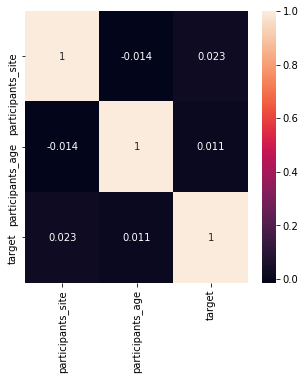

In [9]:
df = data[participant_info_cols + ['target', ]].corr()
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(ax=ax, data=df, annot=True)

Distributions per target

In [10]:
is_asd = data['target'] == 1
is_not_asd = ~is_asd

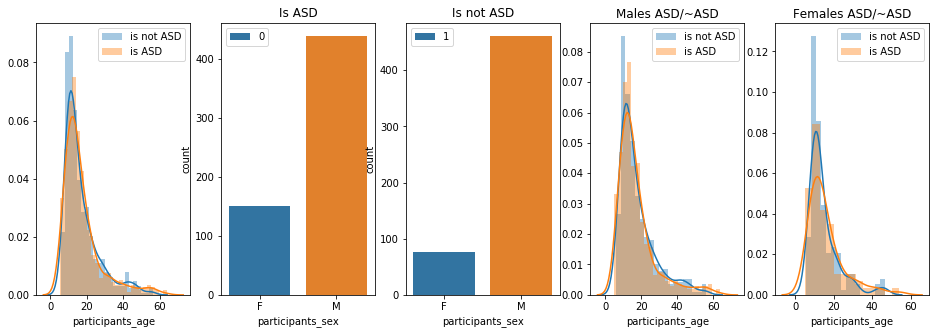

In [11]:
plt.figure(figsize=(16, 5))
plt.subplot(151)
sns.distplot(data[is_not_asd]['participants_age'], label='is not ASD')
sns.distplot(data[is_asd]['participants_age'], label='is ASD')
plt.legend()

plt.subplot(152)
plt.title("Is ASD")
sns.countplot(x='participants_sex', data=data[is_not_asd], label='0')
plt.legend()

plt.subplot(153)
plt.title("Is not ASD")
sns.countplot(x='participants_sex', data=data[is_asd], label='1')
plt.legend()

is_male = data['participants_sex'] == 'M'

plt.subplot(154)
plt.title("Males ASD/~ASD")
sns.distplot(data[is_not_asd & is_male]['participants_age'], label='is not ASD')
sns.distplot(data[is_asd & is_male]['participants_age'], label='is ASD')
plt.legend()

plt.subplot(155)
plt.title("Females ASD/~ASD")
sns.distplot(data[is_not_asd & (~is_male)]['participants_age'], label='is not ASD')
sns.distplot(data[is_asd & (~is_male)]['participants_age'], label='is ASD')

plt.legend()

## Brain anatomy 
#### Brain ventricle size:

In [56]:
accepted_anatomy = data['anatomy_select'] < 2

In [57]:
anatomy_ventricle_cols = [c for c in anatomy_info_cols if "ventricle" in c.lower()]
anatomy_ventricle_cols

['anatomy_Left-Lateral-Ventricle',
 'anatomy_3rd-Ventricle',
 'anatomy_4th-Ventricle',
 'anatomy_Right-Lateral-Ventricle',
 'anatomy_5th-Ventricle']

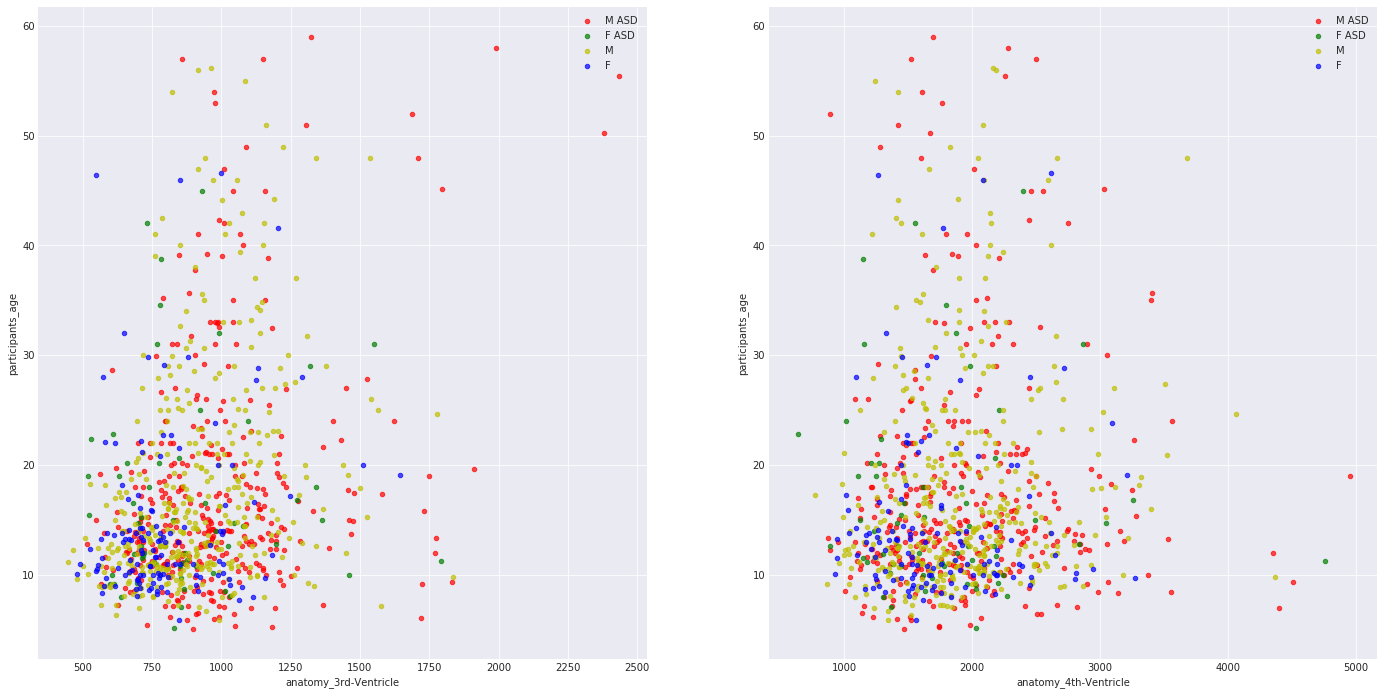

In [58]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(24, 12))
    ax = plt.subplot(121)
    data[accepted_anatomy & is_male & is_asd].plot(x='anatomy_3rd-Ventricle', y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x='anatomy_3rd-Ventricle', y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & ~is_asd].plot(x='anatomy_3rd-Ventricle', y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x='anatomy_3rd-Ventricle', y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

    ax = plt.subplot(122)
    data[accepted_anatomy & is_male & is_asd].plot(x='anatomy_4th-Ventricle', y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x='anatomy_4th-Ventricle', y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & ~is_asd].plot(x='anatomy_4th-Ventricle', y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x='anatomy_4th-Ventricle', y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

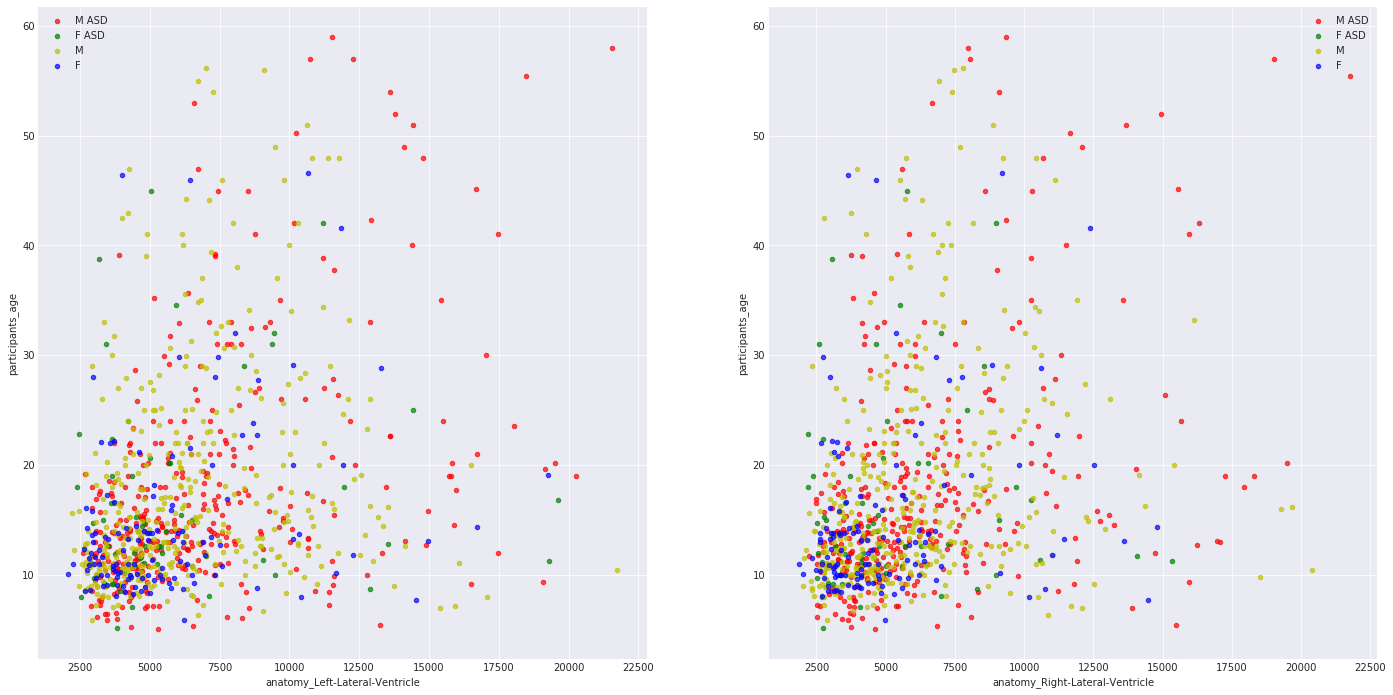

In [59]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(24, 12))
    ax = plt.subplot(121)
    data[accepted_anatomy & is_male & is_asd].plot(x='anatomy_Left-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x='anatomy_Left-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x='anatomy_Left-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x='anatomy_Left-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

    ax = plt.subplot(122)
    data[accepted_anatomy & is_male & is_asd].plot(x='anatomy_Right-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x='anatomy_Right-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x='anatomy_Right-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x='anatomy_Right-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

In [65]:
data.loc[:, "anatomy_sym-Lateral-Ventricle"] = data['anatomy_Left-Lateral-Ventricle'] / (data['anatomy_Right-Lateral-Ventricle'] + 1e-10)


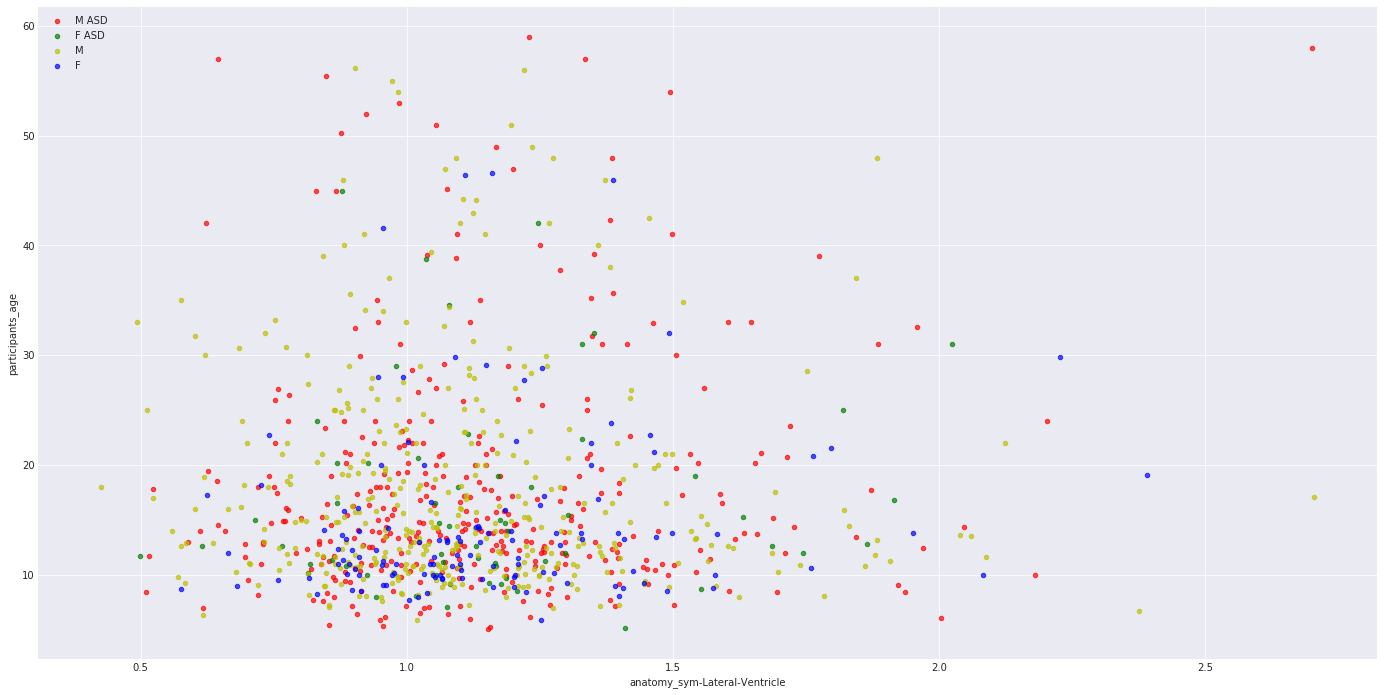

In [68]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(24, 12))
    ax = plt.subplot(111)
    col = "anatomy_sym-Lateral-Ventricle"
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

### Lingual brain area

In [60]:
[c for c in anatomy_info_cols if "ling" in c]

['anatomy_lh_lingual_area',
 'anatomy_rh_lingual_area',
 'anatomy_lh_lingual_thickness',
 'anatomy_rh_lingual_thickness']

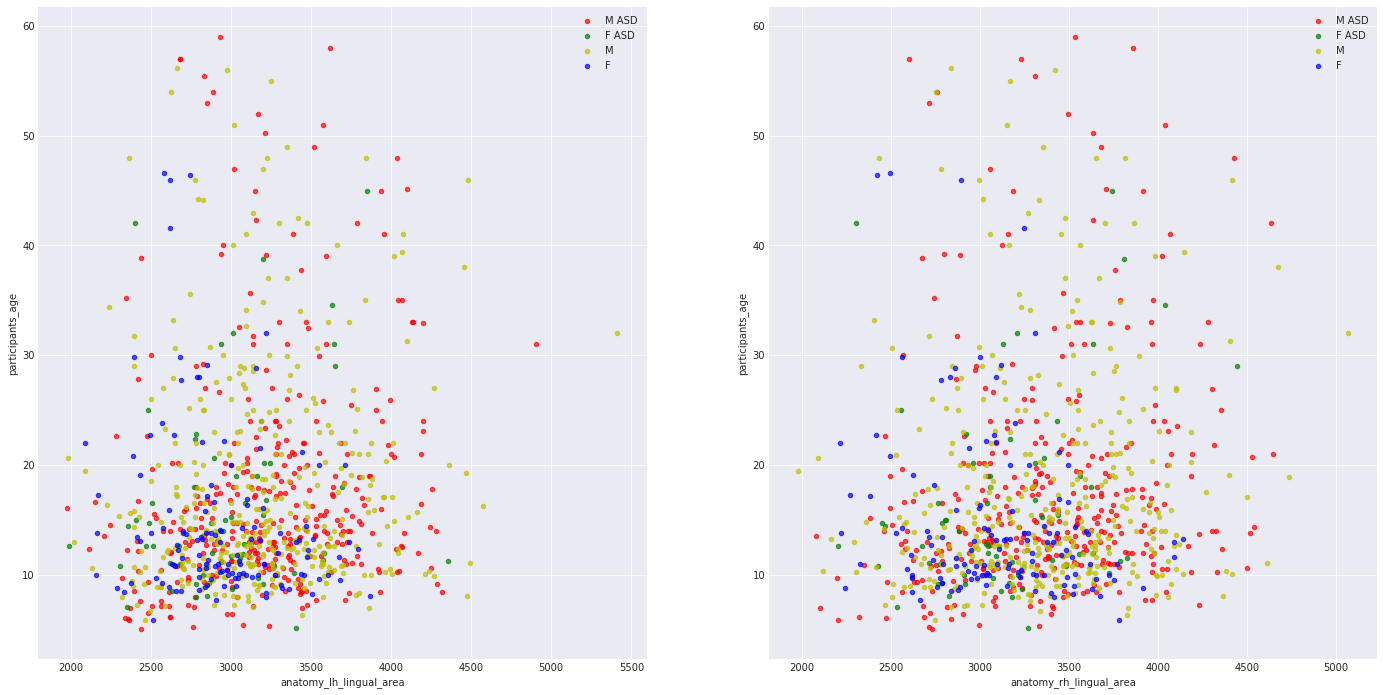

In [61]:
with sns.axes_style('darkgrid'):

    plt.figure(figsize=(24, 12))
    ax = plt.subplot(121)
    col = 'anatomy_lh_lingual_area'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

    ax = plt.subplot(122)
    col = 'anatomy_rh_lingual_area'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

In [63]:
data.loc[:, 'anatomy_sym_lingual_area'] = data['anatomy_lh_lingual_area'] / (data['anatomy_rh_lingual_area'] + 1e-10)

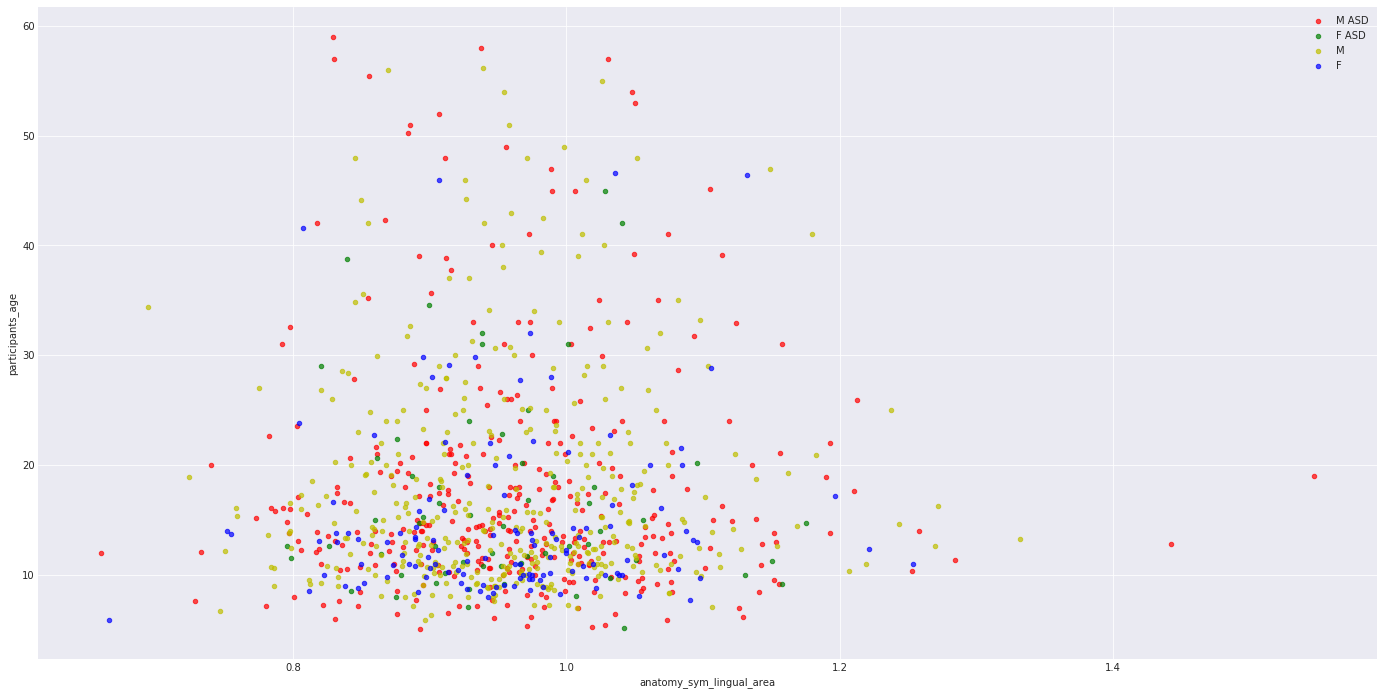

In [67]:
with sns.axes_style('darkgrid'):

    plt.figure(figsize=(24, 12))
    ax = plt.subplot(111)
    col = 'anatomy_sym_lingual_area'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

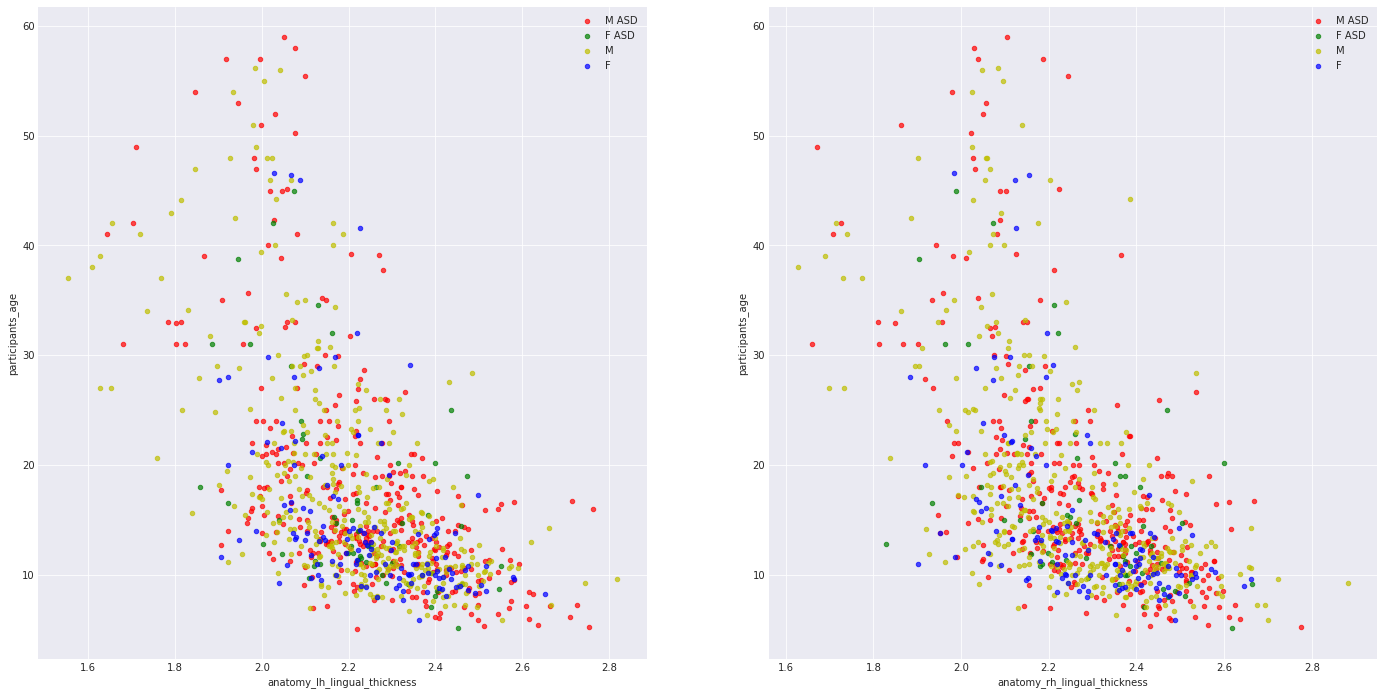

In [62]:
with sns.axes_style('darkgrid'):

    plt.figure(figsize=(24, 12))
    ax = plt.subplot(121)
    col = 'anatomy_lh_lingual_thickness'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

    ax = plt.subplot(122)
    col = 'anatomy_rh_lingual_thickness'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

In [69]:
data.loc[:, 'anatomy_sym_lingual_thickness'] = data['anatomy_lh_lingual_thickness'] / (data['anatomy_rh_lingual_thickness'] + 1e-10)


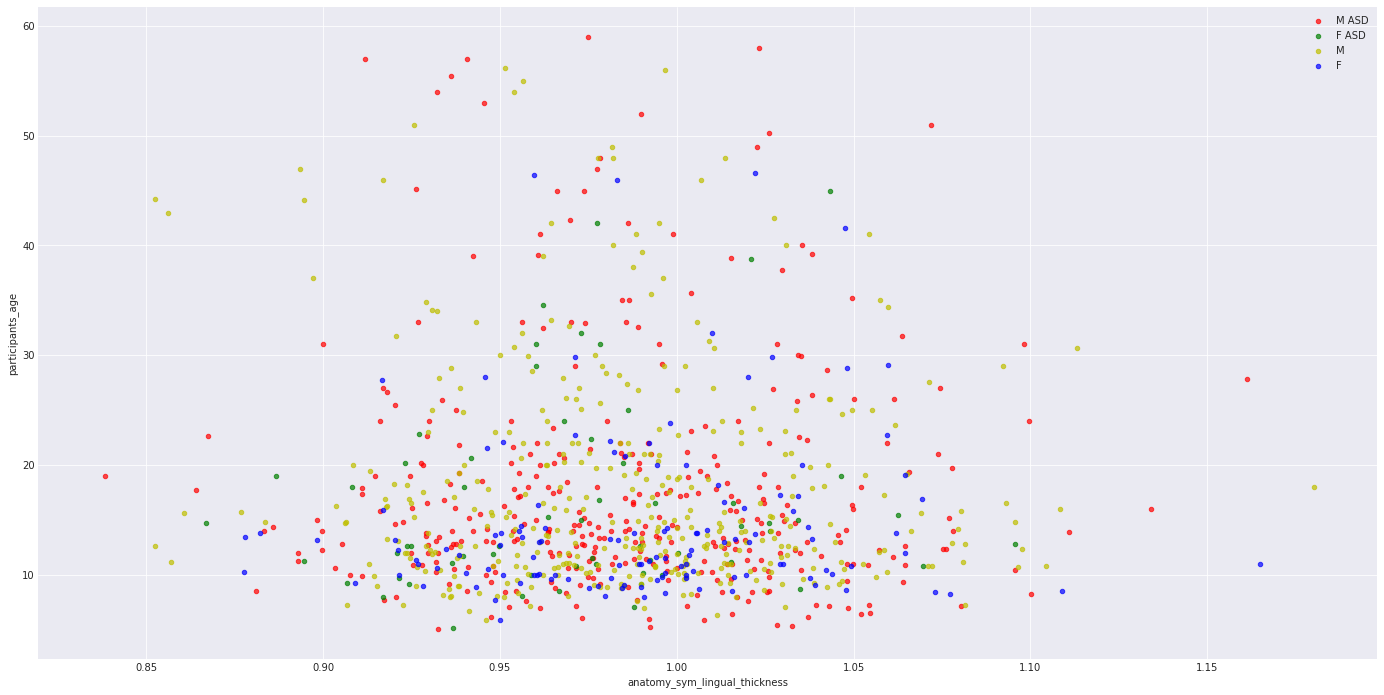

In [70]:
with sns.axes_style('darkgrid'):

    plt.figure(figsize=(24, 12))
    ax = plt.subplot(111)
    col = 'anatomy_sym_lingual_thickness'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()


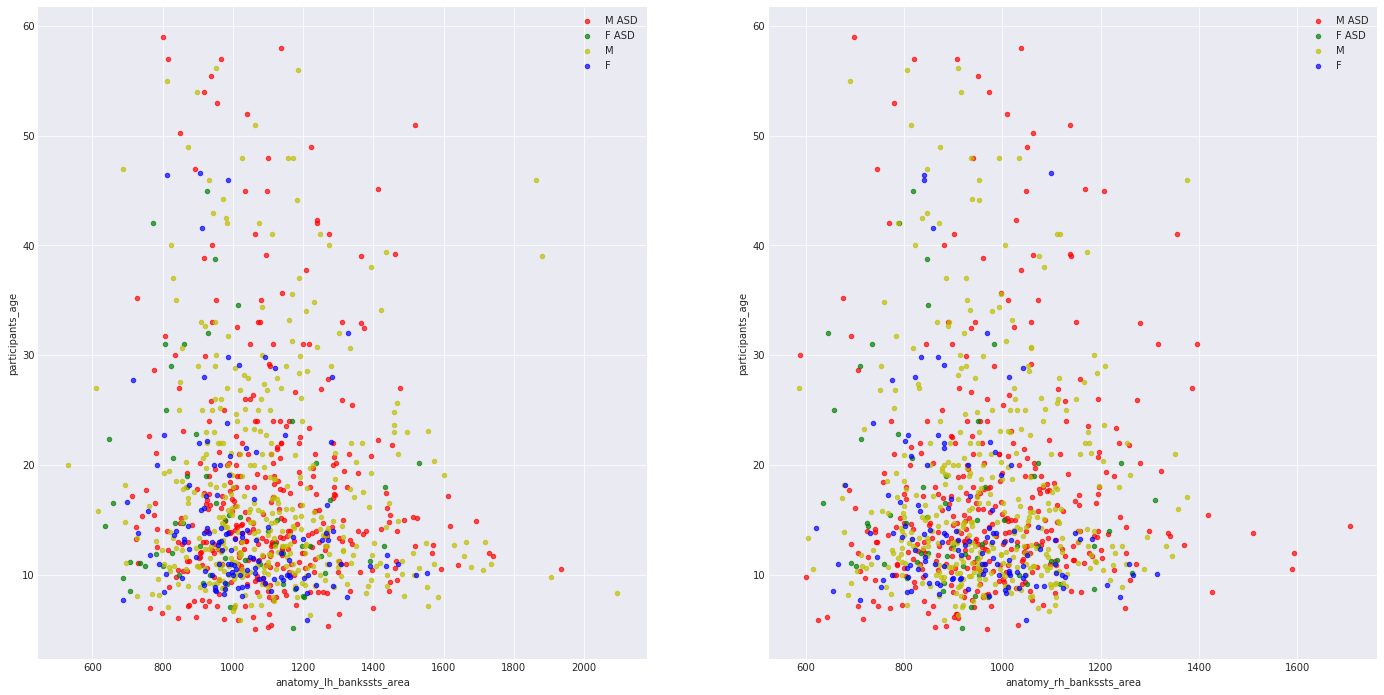

In [74]:
with sns.axes_style('darkgrid'):

    plt.figure(figsize=(24, 12))
    ax = plt.subplot(121)
    col = 'anatomy_lh_bankssts_area'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

    ax = plt.subplot(122)
    col = 'anatomy_rh_bankssts_area'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()